In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from utils.helper_functions import * 

dirnames = ["Asia", "Europe", "North_America" ]
ref_sets_A = ["Maharashtra", "Maharashtra_nearby_states","India", "Asia", "Global_next_regions"]
ref_sets_E = ["Netherlands", "Netherlands_nearby_countries","Europe", "Global_next_regions"]
ref_sets_NA = ["Connecticut", "Connecticut_nearby_states", "USA",  "North_America", "Global_next_regions"]

allele_freqs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ref_sets = [ref_sets_A, ref_sets_E, ref_sets_NA]
abundances = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]


produce result files

In [26]:

for dir, ref in zip(dirnames, ref_sets):
    output_results_to_json_af(dir,"0.0", ref, allele_freqs, abundances, "B.1.1.7_sequence")

read results

In [3]:
results = dict()

for continent in dirnames: 
    results[continent] = dict()
    # load results
    with open("results_{}.json".format(continent)) as json_file:
        results[continent] = json.loads(json_file.read())


calculate absolute errors

In [4]:
ref_sets_dict = dict()

for continent, ref_set_list in zip(dirnames, ref_sets):
    ref_sets_dict[continent] = ref_set_list

absolute_errors = calculate_absolute_errors_af(results, allele_freqs, abundances, ref_sets_dict, dirnames)

[0.48, 0.39, 0.43, 0.67, 0.6, 0.4, 0.25, 0.2, 0.64, 1.15]
[0.74, 0.99, 1.43, 1.83, 2.01, 2.0, 2.04, 1.72, 1.4, 0.99]
[0.77, 1.03, 1.44, 1.86, 2.05, 2.06, 2.17, 1.84, 1.59, 1.23]
[0.89, 1.22, 1.68, 2.08, 2.31, 2.34, 2.47, 2.14, 1.9, 1.54]
[0.19, 0.56, 0.78, 0.96, 1.3, 1.78, 2.18, 2.89, 3.47, 4.11]
[0.19, 0.65, 0.85, 1.03, 1.38, 1.85, 2.23, 2.94, 3.51, 4.15]
[0.17, 0.52, 0.74, 1.0, 1.34, 1.8, 2.17, 2.88, 3.44, 4.09]
[0.17, 0.52, 0.74, 1.01, 1.34, 1.81, 2.18, 2.88, 3.45, 4.09]
[0.2, 0.56, 0.77, 1.03, 1.37, 1.85, 2.25, 2.95, 3.52, 4.16]
[0.2, 0.56, 0.77, 1.03, 1.37, 1.85, 2.25, 2.95, 3.52, 4.16]
[0.2, 0.56, 0.77, 1.03, 1.37, 1.85, 2.25, 2.95, 3.52, 4.16]
[1.15, 1.43, 5.68, 1.42, 7.08, 13.2, 9.56, 17.56, 7.33, 17.48]
[0.99, 1.33, 2.1, 3.95, 1.34, 7.28, 3.06, 11.15, 1.93, 12.07]
[1.23, 1.77, 1.79, 4.12, 1.49, 7.61, 4.47, 12.63, 4.51, 14.73]
[1.54, 2.42, 1.19, 4.09, 1.62, 7.71, 4.26, 12.41, 4.4, 14.64]
[4.11, 7.58, 13.99, 15.6, 22.9, 30.66, 31.75, 40.58, 38.59, 48.49]
[4.15, 7.74, 14.21, 15.8

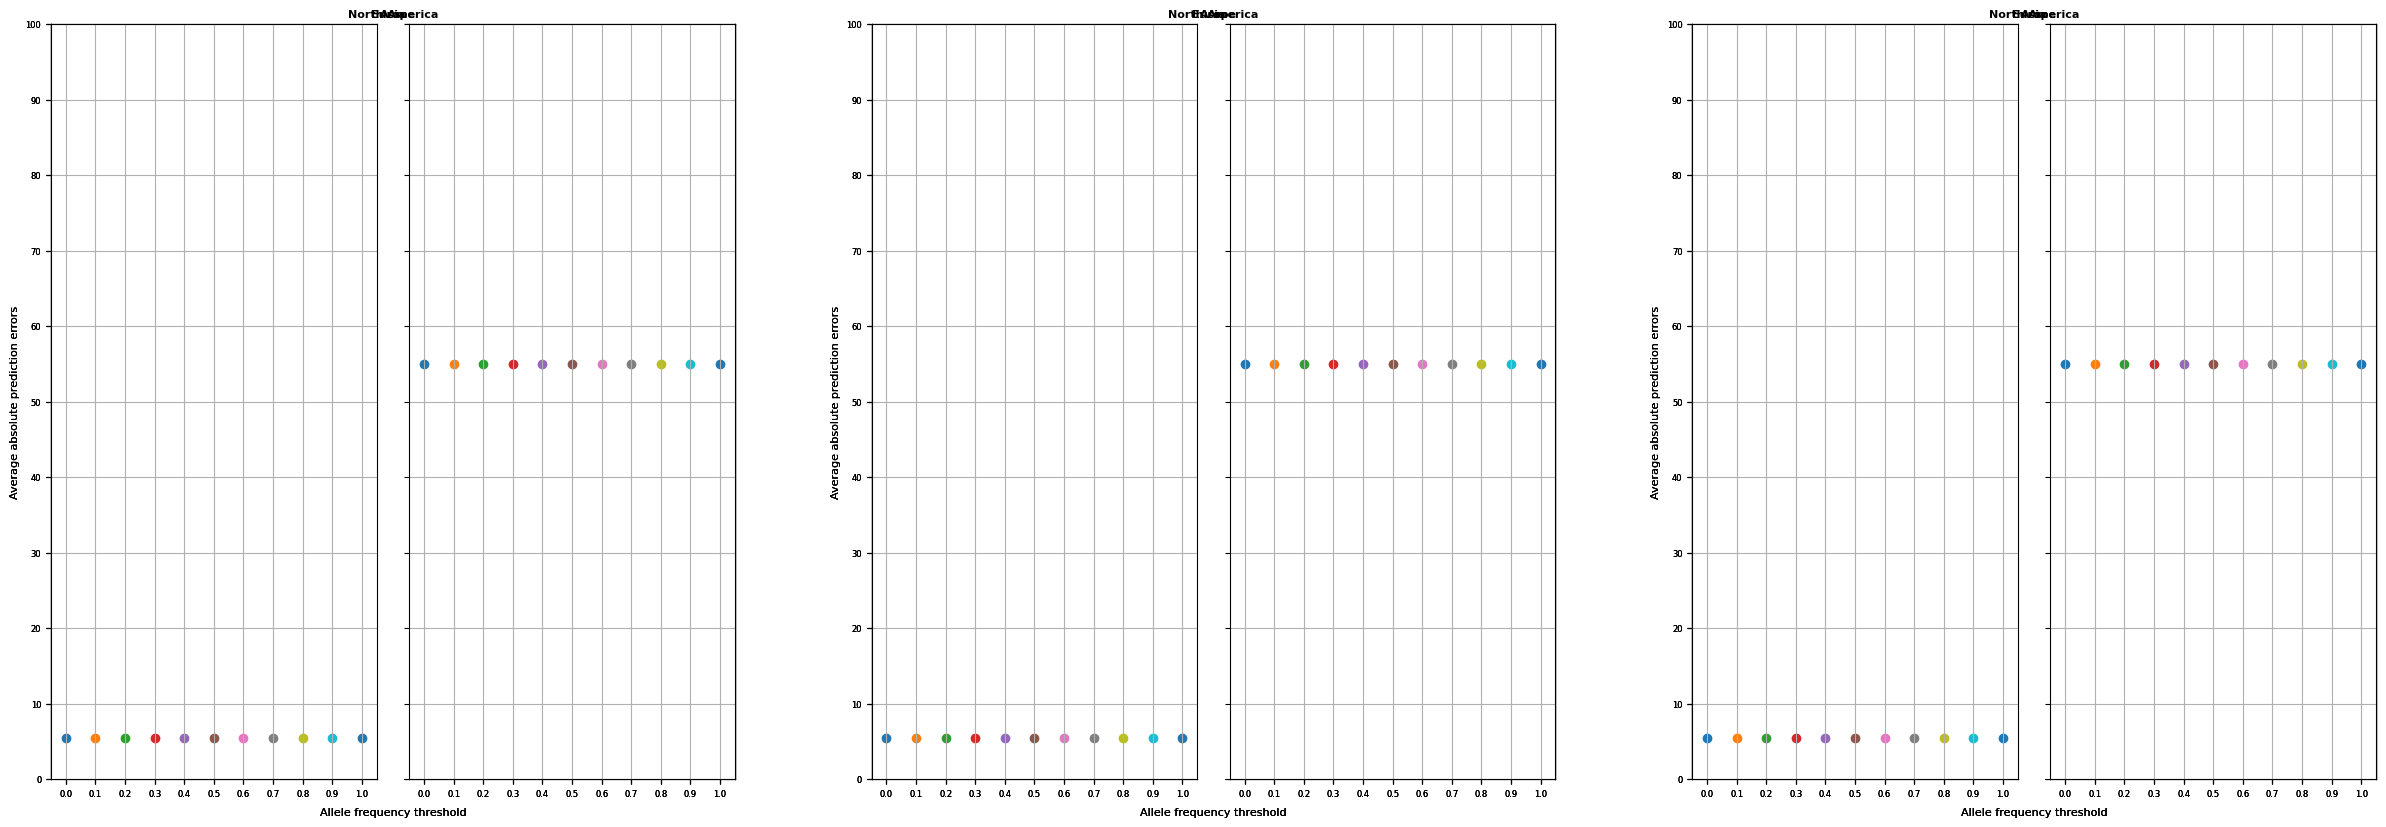

In [55]:
from utils.plotting_functions import *
if os.path.isdir("figures") != True:
    os.mkdir("figures")


plot_with_line_plots_two_scales(dirnames, ref_sets_dict, absolute_errors, "figures", allele_freqs)